In [10]:
import json
import networkx as nx
import os
from rdflib import Graph
from collections import defaultdict, Counter


In [64]:
# Load RDF triples from JSON file
folder_path = 'computers_rdf'

# Initialize an empty graph
G = nx.Graph()

# Initialize a list to store properties and categories

# categories = defaultdict(list)
def get_triples(folder_path):
# Read and parse each JSON file
    triples = []
    for filename in os.listdir(folder_path):
        
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as f:
                data = json.load(f)
                for triple in data:
                    subject = triple['subject']
                    predicate = triple['predicate']
                    object = triple['object']
                    # category = triple.get('category', 'unknown')  # Default to 'unknown' if 'category' is not present
                    triples.append((subject, predicate, object))
                    # categories[category].append(triple)
                    G.add_edge(subject, object, label=predicate)
        return triples

# print("Loaded and parsed RDF triples from JSON files.")


triples = get_triples(folder_path)
properties = [p for s, p, o in triples]


property_counts = Counter(properties)
top_50_properties = property_counts.most_common(50)
print(top_50_properties)




[('http://dbpedia.org/ontology/wikiPageWikiLink', 40), ('http://www.w3.org/1999/02/22-rdf-syntax-ns#type', 33), ('http://purl.org/dc/terms/subject', 13), ('http://www.w3.org/2000/01/rdf-schema#label', 3), ('http://www.w3.org/2000/01/rdf-schema#comment', 3), ('http://xmlns.com/foaf/0.1/name', 1), ('http://dbpedia.org/property/name', 1), ('http://xmlns.com/foaf/0.1/depiction', 1), ('http://dbpedia.org/ontology/birthPlace', 1), ('http://dbpedia.org/property/birthPlace', 1), ('http://dbpedia.org/ontology/birthDate', 1), ('http://dbpedia.org/ontology/wikiPageID', 1), ('http://dbpedia.org/ontology/wikiPageRevisionID', 1)]


In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

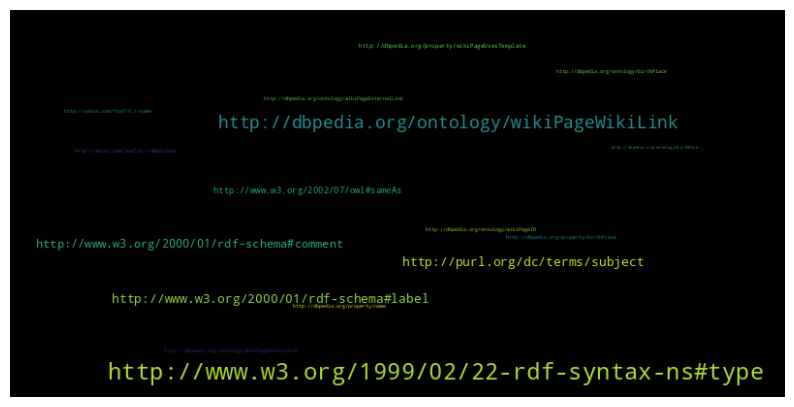

In [41]:
wordcloud = WordCloud(width=800, height=400, background_color ='black').generate_from_frequencies(property_counts)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [43]:
import seaborn as sns
import pandas as pd

                                            property  num_facts
0  [http://www.w3.org/1999/02/22-rdf-syntax-ns#ty...        100
1  [http://www.w3.org/1999/02/22-rdf-syntax-ns#ty...         89
2  [http://www.w3.org/1999/02/22-rdf-syntax-ns#ty...         18
3  [http://www.w3.org/1999/02/22-rdf-syntax-ns#ty...        100
4  [http://www.w3.org/1999/02/22-rdf-syntax-ns#ty...        100
Min facts: 8
Max facts: 100
Avg facts: 89.91


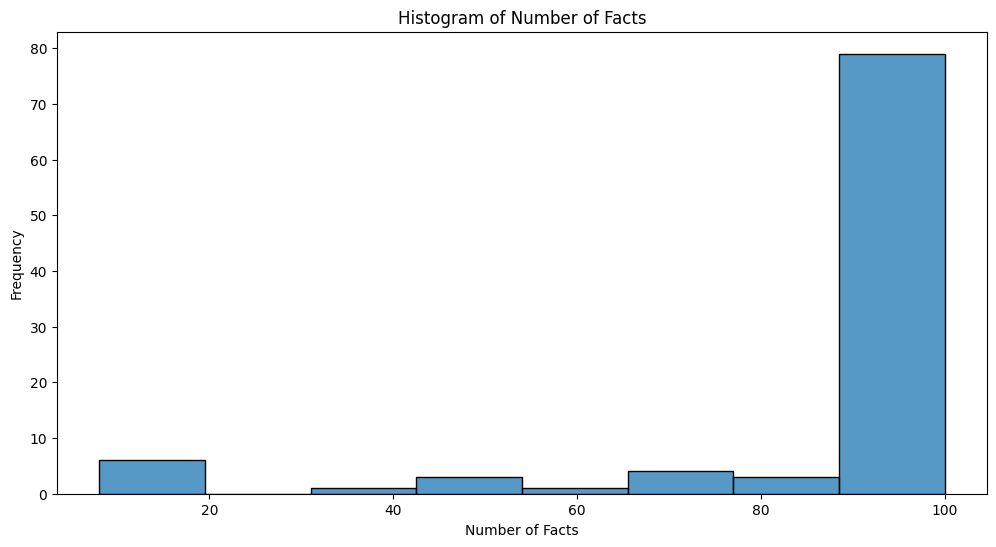

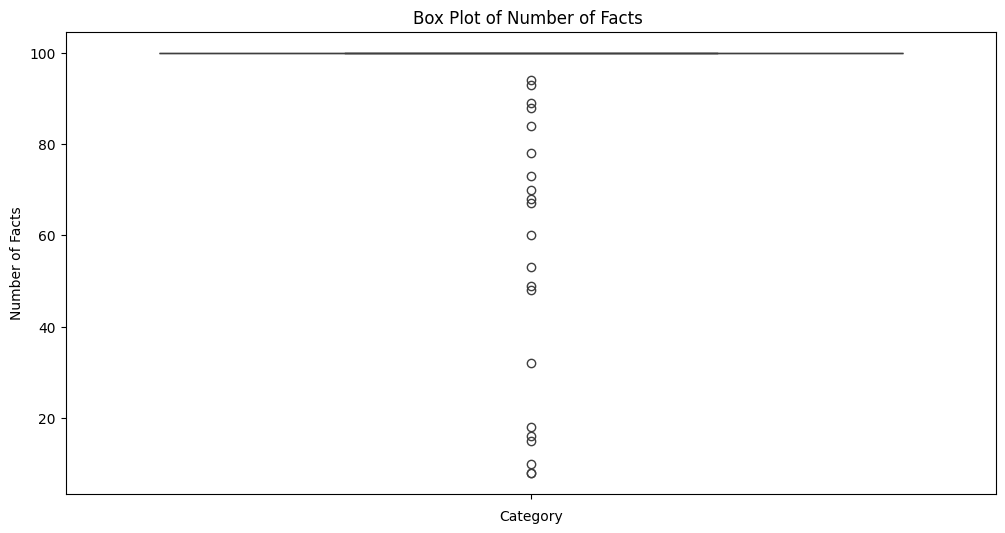

In [69]:
# Initialize lists to store facts count per graph and per category
facts_per_graph = []
# facts_per_category = []
facts = []

# Calculate facts per graph
for filename in os.listdir(folder_path):
    if filename.endswith(".json"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            num_facts = len(data)  # Adjust this according to your JSON structure
            facts_per_graph.append(num_facts)

            # Assuming category information is in the JSON (adjust accordingly)
            # category = data['category']
            facts.append((properties, num_facts))

# Convert to DataFrame for analysis
df_facts = pd.DataFrame(facts, columns=['property', 'num_facts'])
print(df_facts.head())

# Calculate statistics
min_facts = df_facts['num_facts'].min()
max_facts = df_facts['num_facts'].max()
avg_facts = df_facts['num_facts'].mean()

print(f"Min facts: {min_facts}")
print(f"Max facts: {max_facts}")
print(f"Avg facts: {avg_facts:.2f}")

# Create histograms
plt.figure(figsize=(12, 6))
sns.histplot(df_facts['num_facts'])
plt.title('Histogram of Number of Facts')
plt.xlabel('Number of Facts')
plt.ylabel('Frequency')
plt.show()

# Create box plots
plt.figure(figsize=(12, 6))
sns.boxplot(df_facts['num_facts'])
plt.title('Box Plot of Number of Facts ')
plt.xlabel('Category')
plt.ylabel('Number of Facts')
plt.xticks(rotation=90)
plt.show()
